In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Iterations that were run: 10


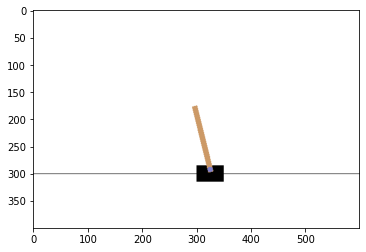

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

# DP

In [ ]:
import torch
from torch import nn

In [ ]:
class DP():
  def __init__(self):
    self.maxlifetime = 200
    self.value = {}
    self.stepsHistory = {}
    
  def act(self, state):
    a = env.action_space.sample()
    if not state in self.value:
      for _ in range(env.action_space.n):
        self.value[state].append(0)
    for action in range(env.action_space.n):
      if self.value[state][a] < self.value[state][action]:
        a = action
    return a

  def getState(self,obs):
    state = ""
    for o in obs:
      state += str(math.floor(o))
    return state 

  def update(self, )

In [ ]:
model = DP()


#  MC

A Monte Carlo solution requires a e-soft policy to get the capablity of exploration. We can generate several episodes with both exploration and exploitation which would be the experience the agent will learn from. In order to get a final deterministic policy, a decay would be applied on the e.

In [ ]:
from random import randint
import math

In [ ]:
nbEpisodes = 2000


In [ ]:
class MC():
  def __init__(self):
    self.stepsHistory = [0]*2000
    self.value = {}
    self.decayW = 0.02
    self.decayB = 20
    self.maxlifetime = 200

  def act(self,state,decay):
    minCount = 0 #env.action_space.sample()
    maxValue = 0 #env.action_space.sample()
    if not state in self.value:
      self.value[state] = []
      for _ in range(env.action_space.n):
        self.value[state].append({'count':0, 'value':0})
    for action in range(env.action_space.n):
      if self.value[state][minCount]['count'] > self.value[state][action]['count']:
        minCount = action
      if self.value[state][maxValue]['value'] < self.value[state][action]['value']:
        maxValue = action
    if randint(0, 100) < decay:
      return minCount
    else:
      return maxValue
  def Decay(self,epicode_count):
    return max(-epicode_count*self.decayW+self.decayB,10/(epicode_count+1))

  def mc_sample(self, obs, decay, epicode_count):
    episodeStatesActions = []
    G = 0
    for t in range(self.maxlifetime):
      state = self.getState(obs)
      action = self.act(state,decay)
      episodeStatesActions.append({'state': state, 'action': action})
      obs, reward, done, _ = env.step(action)
      G += reward
      if done:
        self.stepsHistory[epicode_count] = t
        for i, state_action in enumerate(episodeStatesActions):
          self.update(state_action['state'], state_action['action'], G-i)
        break

  def update(self, state, action, G):
	  self.value[state][action]['value'] = (self.value[state][action]['value'] * self.value[state][action]['count'] + G) / (self.value[state][action]['count'] + 1)
	  self.value[state][action]['count'] += 1

  def getState(self,obs):
    state = ""
    for o in obs:
      state += str(math.floor(o))
    return state

In [ ]:
agent = MC()
for epicode_count in range(nbEpisodes):
  obs = env.reset()
  decay = agent.Decay(epicode_count)
  agent.mc_sample(obs,decay,epicode_count)
  

In [ ]:
agent.stepsHistory[-1]

188

Iterations that were run: 154


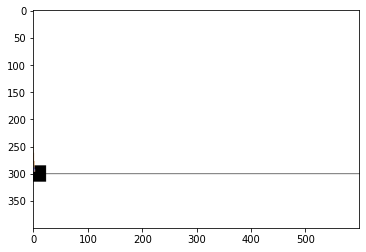

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
obs = env.reset()
for i in range(50000):
  state = agent.getState(obs)
  action = agent.act(state,decay=0)
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)